In [1]:
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa.display
import IPython.display
import soundfile as sf
import os
import errno
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

C:\Users\ioann\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ioann\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ioann\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ioann\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [3]:

import glob
ravdess_clean_list = glob.glob('clean/Users/ioann/ravdess-speech/*.wav')


In [4]:
ravdess_clean_list

['clean/Users/ioann/ravdess-speech\\03-01-01-01-01-01-01.wav',
 'clean/Users/ioann/ravdess-speech\\03-01-01-01-01-01-02.wav',
 'clean/Users/ioann/ravdess-speech\\03-01-01-01-01-01-03.wav',
 'clean/Users/ioann/ravdess-speech\\03-01-01-01-01-01-04.wav',
 'clean/Users/ioann/ravdess-speech\\03-01-01-01-01-01-05.wav',
 'clean/Users/ioann/ravdess-speech\\03-01-01-01-01-01-06.wav',
 'clean/Users/ioann/ravdess-speech\\03-01-01-01-01-01-07.wav',
 'clean/Users/ioann/ravdess-speech\\03-01-01-01-01-01-08.wav',
 'clean/Users/ioann/ravdess-speech\\03-01-01-01-01-01-09.wav',
 'clean/Users/ioann/ravdess-speech\\03-01-01-01-01-01-10.wav',
 'clean/Users/ioann/ravdess-speech\\03-01-01-01-01-01-11.wav',
 'clean/Users/ioann/ravdess-speech\\03-01-01-01-01-01-12.wav',
 'clean/Users/ioann/ravdess-speech\\03-01-01-01-01-01-13.wav',
 'clean/Users/ioann/ravdess-speech\\03-01-01-01-01-01-14.wav',
 'clean/Users/ioann/ravdess-speech\\03-01-01-01-01-01-15.wav',
 'clean/Users/ioann/ravdess-speech\\03-01-01-01-01-01-1

In [5]:
def build_ravdess_index(file_list):
    
    emotion_key = {'01': 'neutral', '02': 'p', '03': 'p', '04': 'n', '05': 'n', '06': 'n', '07': 'n', '08': 'p'}
    df = { 'emotion': [] }
   

    for file in file_list:
        props = file.split('-')
        
        df['emotion'].append(emotion_key[props[3]])
        

        
       

       

    file_properties = pd.DataFrame(df)
    
    return file_properties


In [5]:
emotion_list = build_ravdess_index(ravdess_clean_list)

In [6]:
labels_ravdess = pd.DataFrame(emotion_list)

In [7]:
df = pd.DataFrame(columns=['feature'])
bookmark=0



path = '/Users/ioann/ravdess-speech/'




for subdir, dirs, files in os.walk(path):
    for file in files:
      
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
        feature = mfccs
        df.loc[bookmark] = [feature]
        bookmark=bookmark+1

In [8]:
features_ravdess = pd.DataFrame(df['feature'].values.tolist())
newdf = pd.concat([features_ravdess,labels_ravdess], axis=1)
new_ravdess = newdf.rename(index=str, columns={"0": "label"})

In [9]:
new_ravdess

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,emotion
0,-700.398878,58.630210,-3.025852,16.040243,4.248529,3.869935,-6.381717,-0.188634,-13.735003,-0.319723,...,-2.769772,-2.042008,-2.522663,-2.507449,-2.250499,-0.381507,-2.481059,-2.791022,-2.244866,neutral
1,-653.169017,58.028073,-12.581209,11.818785,-7.681562,-0.617142,-8.337758,-5.823571,-6.547591,1.458057,...,2.570493,2.558635,3.708506,2.790020,2.201920,-1.021457,0.819200,-0.277811,0.207586,neutral
2,-617.052327,60.103365,-5.984258,13.886286,1.120427,0.511750,-14.841357,-4.016369,-5.575839,-6.309851,...,-2.019846,-1.024787,0.331097,0.531833,-1.621018,-2.158077,-2.502774,-0.676132,2.089097,neutral
3,-698.721214,47.088487,-11.333611,12.963090,-8.005652,-1.252229,-10.009068,-9.434125,-10.318875,-0.864674,...,-0.004270,-1.408215,0.958173,2.574661,1.877765,1.608618,0.222401,4.338524,4.266795,neutral
4,-715.922663,71.976798,4.457525,18.602500,8.404048,3.621956,-1.974365,0.022674,-2.678083,4.232804,...,0.424780,0.972097,0.210004,0.667769,1.918957,0.174543,-1.768463,-1.512281,-0.253280,neutral
5,-739.440873,55.755429,-23.246592,13.280397,-3.838021,-5.957225,-12.653000,-6.214706,-10.689208,3.398455,...,5.935799,4.206937,5.363243,4.332376,3.667531,1.550318,-0.558750,1.737009,3.253290,neutral
6,-653.982540,77.230163,1.074312,23.132712,5.029030,2.561855,-10.727559,-3.295055,-1.869739,-0.463441,...,-0.391933,-1.683185,-1.358684,-2.281433,-3.152291,-5.220386,-3.469335,-1.696725,-0.342364,neutral
7,-692.393582,68.048347,3.857427,26.590947,2.598323,6.667670,1.640871,-4.939541,-1.004390,1.792656,...,1.524577,2.985039,5.605745,5.896914,5.154771,4.143033,5.628289,4.912781,4.313900,neutral
8,-741.353967,96.758128,16.994427,37.401855,17.461665,14.264806,1.034319,9.790047,3.433929,9.897499,...,2.135275,1.080048,0.077569,1.954016,0.924915,-0.342838,-1.029033,-1.741040,-0.339235,neutral
9,-574.430922,56.297725,-3.995249,9.307219,0.660650,0.722855,-10.766332,-3.891049,-7.494775,1.972640,...,3.164500,5.605457,3.372160,5.965045,2.542946,2.380176,1.891932,1.244445,3.589855,neutral


In [10]:
def build_ravdess_onesub(file_list):
    
   
    df = { 'actor': [] }
   

    for file in file_list:
        

        props = file.split('-')
        df['actor'].append(props[7])
       

       

    file_properties = pd.DataFrame(df)
    
    return file_properties


In [11]:
actor_list=build_ravdess_onesub(ravdess_clean_list)
actor = pd.DataFrame(actor_list)
newdf = pd.concat([features_ravdess,labels_ravdess,actor], axis=1)
ravdess_new = newdf.rename(index=str, columns={"0": "label"})

In [12]:
actor

,actor
0,01.wav
1,02.wav
2,03.wav
3,04.wav
4,05.wav
5,06.wav
6,07.wav
7,08.wav
8,09.wav
9,10.wav


In [13]:
ravdess_new

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,emotion,actor
0,-700.398878,58.630210,-3.025852,16.040243,4.248529,3.869935,-6.381717,-0.188634,-13.735003,-0.319723,...,-2.042008,-2.522663,-2.507449,-2.250499,-0.381507,-2.481059,-2.791022,-2.244866,neutral,01.wav
1,-653.169017,58.028073,-12.581209,11.818785,-7.681562,-0.617142,-8.337758,-5.823571,-6.547591,1.458057,...,2.558635,3.708506,2.790020,2.201920,-1.021457,0.819200,-0.277811,0.207586,neutral,02.wav
2,-617.052327,60.103365,-5.984258,13.886286,1.120427,0.511750,-14.841357,-4.016369,-5.575839,-6.309851,...,-1.024787,0.331097,0.531833,-1.621018,-2.158077,-2.502774,-0.676132,2.089097,neutral,03.wav
3,-698.721214,47.088487,-11.333611,12.963090,-8.005652,-1.252229,-10.009068,-9.434125,-10.318875,-0.864674,...,-1.408215,0.958173,2.574661,1.877765,1.608618,0.222401,4.338524,4.266795,neutral,04.wav
4,-715.922663,71.976798,4.457525,18.602500,8.404048,3.621956,-1.974365,0.022674,-2.678083,4.232804,...,0.972097,0.210004,0.667769,1.918957,0.174543,-1.768463,-1.512281,-0.253280,neutral,05.wav
5,-739.440873,55.755429,-23.246592,13.280397,-3.838021,-5.957225,-12.653000,-6.214706,-10.689208,3.398455,...,4.206937,5.363243,4.332376,3.667531,1.550318,-0.558750,1.737009,3.253290,neutral,06.wav
6,-653.982540,77.230163,1.074312,23.132712,5.029030,2.561855,-10.727559,-3.295055,-1.869739,-0.463441,...,-1.683185,-1.358684,-2.281433,-3.152291,-5.220386,-3.469335,-1.696725,-0.342364,neutral,07.wav
7,-692.393582,68.048347,3.857427,26.590947,2.598323,6.667670,1.640871,-4.939541,-1.004390,1.792656,...,2.985039,5.605745,5.896914,5.154771,4.143033,5.628289,4.912781,4.313900,neutral,08.wav
8,-741.353967,96.758128,16.994427,37.401855,17.461665,14.264806,1.034319,9.790047,3.433929,9.897499,...,1.080048,0.077569,1.954016,0.924915,-0.342838,-1.029033,-1.741040,-0.339235,neutral,09.wav
9,-574.430922,56.297725,-3.995249,9.307219,0.660650,0.722855,-10.766332,-3.891049,-7.494775,1.972640,...,5.605457,3.372160,5.965045,2.542946,2.380176,1.891932,1.244445,3.589855,neutral,10.wav


In [14]:
def build_ravdess_gender(file_list):
    
   
    df = { 'gender': [] }
   

    for file in file_list:
        

        props = file.split('-')
        if int(props[7][:2]) % 2 == 0:
            df['gender'].append('female')
        else:
            df['gender'].append('male')

       

       

    file_properties = pd.DataFrame(df)
    
    return file_properties


In [15]:
gender_list=build_ravdess_gender(ravdess_clean_list)
gender = pd.DataFrame(gender_list)







In [16]:
newdf_gender = pd.concat([features_ravdess,labels_ravdess,actor,gender], axis=1)
rnewdf_gender = newdf_gender.rename(index=str, columns={"0": "label"})


In [17]:
rnewdf_gender

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,emotion,actor,gender
0,-700.398878,58.630210,-3.025852,16.040243,4.248529,3.869935,-6.381717,-0.188634,-13.735003,-0.319723,...,-2.522663,-2.507449,-2.250499,-0.381507,-2.481059,-2.791022,-2.244866,neutral,01.wav,male
1,-653.169017,58.028073,-12.581209,11.818785,-7.681562,-0.617142,-8.337758,-5.823571,-6.547591,1.458057,...,3.708506,2.790020,2.201920,-1.021457,0.819200,-0.277811,0.207586,neutral,02.wav,female
2,-617.052327,60.103365,-5.984258,13.886286,1.120427,0.511750,-14.841357,-4.016369,-5.575839,-6.309851,...,0.331097,0.531833,-1.621018,-2.158077,-2.502774,-0.676132,2.089097,neutral,03.wav,male
3,-698.721214,47.088487,-11.333611,12.963090,-8.005652,-1.252229,-10.009068,-9.434125,-10.318875,-0.864674,...,0.958173,2.574661,1.877765,1.608618,0.222401,4.338524,4.266795,neutral,04.wav,female
4,-715.922663,71.976798,4.457525,18.602500,8.404048,3.621956,-1.974365,0.022674,-2.678083,4.232804,...,0.210004,0.667769,1.918957,0.174543,-1.768463,-1.512281,-0.253280,neutral,05.wav,male
5,-739.440873,55.755429,-23.246592,13.280397,-3.838021,-5.957225,-12.653000,-6.214706,-10.689208,3.398455,...,5.363243,4.332376,3.667531,1.550318,-0.558750,1.737009,3.253290,neutral,06.wav,female
6,-653.982540,77.230163,1.074312,23.132712,5.029030,2.561855,-10.727559,-3.295055,-1.869739,-0.463441,...,-1.358684,-2.281433,-3.152291,-5.220386,-3.469335,-1.696725,-0.342364,neutral,07.wav,male
7,-692.393582,68.048347,3.857427,26.590947,2.598323,6.667670,1.640871,-4.939541,-1.004390,1.792656,...,5.605745,5.896914,5.154771,4.143033,5.628289,4.912781,4.313900,neutral,08.wav,female
8,-741.353967,96.758128,16.994427,37.401855,17.461665,14.264806,1.034319,9.790047,3.433929,9.897499,...,0.077569,1.954016,0.924915,-0.342838,-1.029033,-1.741040,-0.339235,neutral,09.wav,male
9,-574.430922,56.297725,-3.995249,9.307219,0.660650,0.722855,-10.766332,-3.891049,-7.494775,1.972640,...,3.372160,5.965045,2.542946,2.380176,1.891932,1.244445,3.589855,neutral,10.wav,female


In [18]:
rnewdf=rnewdf_gender


In [40]:
rnewdf.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,emotion,actor,gender
0,-700.398878,58.630210,-3.025852,16.040243,4.248529,3.869935,-6.381717,-0.188634,-13.735003,-0.319723,...,-2.522663,-2.507449,-2.250499,-0.381507,-2.481059,-2.791022,-2.244866,neutral,01.wav,male
1,-653.169017,58.028073,-12.581209,11.818785,-7.681562,-0.617142,-8.337758,-5.823571,-6.547591,1.458057,...,3.708506,2.790020,2.201920,-1.021457,0.819200,-0.277811,0.207586,neutral,02.wav,female
2,-617.052327,60.103365,-5.984258,13.886286,1.120427,0.511750,-14.841357,-4.016369,-5.575839,-6.309851,...,0.331097,0.531833,-1.621018,-2.158077,-2.502774,-0.676132,2.089097,neutral,03.wav,male
3,-698.721214,47.088487,-11.333611,12.963090,-8.005652,-1.252229,-10.009068,-9.434125,-10.318875,-0.864674,...,0.958173,2.574661,1.877765,1.608618,0.222401,4.338524,4.266795,neutral,04.wav,female
4,-715.922663,71.976798,4.457525,18.602500,8.404048,3.621956,-1.974365,0.022674,-2.678083,4.232804,...,0.210004,0.667769,1.918957,0.174543,-1.768463,-1.512281,-0.253280,neutral,05.wav,male


In [19]:
female_df=(rnewdf.loc[rnewdf['gender'] != 'male'])

female_df=female_df.fillna(0)
female_df

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,emotion,actor,gender
1,-653.169017,58.028073,-12.581209,11.818785,-7.681562,-0.617142,-8.337758,-5.823571,-6.547591,1.458057,...,3.708506,2.790020,2.201920,-1.021457,0.819200,-0.277811,0.207586,neutral,02.wav,female
3,-698.721214,47.088487,-11.333611,12.963090,-8.005652,-1.252229,-10.009068,-9.434125,-10.318875,-0.864674,...,0.958173,2.574661,1.877765,1.608618,0.222401,4.338524,4.266795,neutral,04.wav,female
5,-739.440873,55.755429,-23.246592,13.280397,-3.838021,-5.957225,-12.653000,-6.214706,-10.689208,3.398455,...,5.363243,4.332376,3.667531,1.550318,-0.558750,1.737009,3.253290,neutral,06.wav,female
7,-692.393582,68.048347,3.857427,26.590947,2.598323,6.667670,1.640871,-4.939541,-1.004390,1.792656,...,5.605745,5.896914,5.154771,4.143033,5.628289,4.912781,4.313900,neutral,08.wav,female
9,-574.430922,56.297725,-3.995249,9.307219,0.660650,0.722855,-10.766332,-3.891049,-7.494775,1.972640,...,3.372160,5.965045,2.542946,2.380176,1.891932,1.244445,3.589855,neutral,10.wav,female
11,-686.793732,63.759015,-5.019265,14.655203,-2.392172,-0.812546,-5.175949,-6.032188,-13.602619,-1.257705,...,4.932687,5.131727,3.666039,4.504458,1.554605,0.302437,-2.583656,neutral,12.wav,female
13,-765.338586,47.169830,1.476838,15.077700,-10.482029,-1.461810,-8.149069,-4.225049,-7.926242,0.051971,...,0.504372,1.259402,2.089944,3.679059,2.809832,1.927483,1.177062,neutral,14.wav,female
15,-663.830633,61.380003,2.275193,12.700737,-4.215593,-4.703434,-11.695962,-3.269569,-8.981364,-0.019918,...,-0.209263,-0.497776,0.500730,1.943027,2.300725,2.240043,1.939023,neutral,16.wav,female
17,-754.981614,59.807533,0.850680,15.180320,-4.610334,-0.571079,-6.452572,-9.619606,-11.002419,2.098613,...,-1.853533,-1.035654,0.965440,4.182645,7.387866,10.678265,10.405077,neutral,18.wav,female
19,-719.650165,40.265067,-10.677992,12.497934,-10.565180,-2.727621,-11.100496,-7.746538,-8.434710,-1.384802,...,2.236037,2.297235,3.286657,2.094471,1.377533,-1.344257,-1.004930,neutral,20.wav,female


In [33]:
trainfeatures

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-700.398878,58.630210,-3.025852,16.040243,4.248529,3.869935,-6.381717,-0.188634,-13.735003,-0.319723,...,-1.411359,-2.769772,-2.042008,-2.522663,-2.507449,-2.250499,-0.381507,-2.481059,-2.791022,-2.244866
1,-653.169017,58.028073,-12.581209,11.818785,-7.681562,-0.617142,-8.337758,-5.823571,-6.547591,1.458057,...,0.788761,2.570493,2.558635,3.708506,2.790020,2.201920,-1.021457,0.819200,-0.277811,0.207586
2,-617.052327,60.103365,-5.984258,13.886286,1.120427,0.511750,-14.841357,-4.016369,-5.575839,-6.309851,...,-1.133367,-2.019846,-1.024787,0.331097,0.531833,-1.621018,-2.158077,-2.502774,-0.676132,2.089097
3,-698.721214,47.088487,-11.333611,12.963090,-8.005652,-1.252229,-10.009068,-9.434125,-10.318875,-0.864674,...,-0.299306,-0.004270,-1.408215,0.958173,2.574661,1.877765,1.608618,0.222401,4.338524,4.266795
4,-715.922663,71.976798,4.457525,18.602500,8.404048,3.621956,-1.974365,0.022674,-2.678083,4.232804,...,0.505697,0.424780,0.972097,0.210004,0.667769,1.918957,0.174543,-1.768463,-1.512281,-0.253280
5,-739.440873,55.755429,-23.246592,13.280397,-3.838021,-5.957225,-12.653000,-6.214706,-10.689208,3.398455,...,4.583356,5.935799,4.206937,5.363243,4.332376,3.667531,1.550318,-0.558750,1.737009,3.253290
6,-653.982540,77.230163,1.074312,23.132712,5.029030,2.561855,-10.727559,-3.295055,-1.869739,-0.463441,...,-4.285201,-0.391933,-1.683185,-1.358684,-2.281433,-3.152291,-5.220386,-3.469335,-1.696725,-0.342364
7,-692.393582,68.048347,3.857427,26.590947,2.598323,6.667670,1.640871,-4.939541,-1.004390,1.792656,...,1.513685,1.524577,2.985039,5.605745,5.896914,5.154771,4.143033,5.628289,4.912781,4.313900
8,-741.353967,96.758128,16.994427,37.401855,17.461665,14.264806,1.034319,9.790047,3.433929,9.897499,...,1.575394,2.135275,1.080048,0.077569,1.954016,0.924915,-0.342838,-1.029033,-1.741040,-0.339235
9,-574.430922,56.297725,-3.995249,9.307219,0.660650,0.722855,-10.766332,-3.891049,-7.494775,1.972640,...,3.434052,3.164500,5.605457,3.372160,5.965045,2.542946,2.380176,1.891932,1.244445,3.589855


In [25]:
#test ston 24
train=(ravdess_new.loc[ravdess_new['actor'] != '24.wav'])
test=(ravdess_new.loc[ravdess_new['actor'] == '24.wav'])

In [161]:
#for train-test 80-20
df1 = np.random.rand(len(rnewdf)) < 0.8
train = rnewdf[df1]
test = rnewdf[~df1]

In [31]:
trainfeatures = train.iloc[:, :-2]
trainlabel = train.iloc[:, -2]

In [32]:
#test=(ravdess_new.loc[ravdess_new['actor'] == '01.wav'])
testfeatures = test.iloc[:, :-2]
testlabel = test.iloc[:, -2]
testlabel

23      neutral
47      neutral
71      neutral
95      neutral
119           p
143           p
167           p
191           p
215           p
239           p
263           p
287           p
311           p
335           p
359           p
383           p
407           p
431           p
455           p
479           p
503           n
527           n
551           n
575           n
599           n
623           n
647           n
671           n
695           n
719           n
743           n
767           n
791           n
815           n
839           n
863           n
887           n
911           n
935           n
959           n
983           n
1007          n
1031          n
1055          n
1079          n
1103          n
1127          n
1151          n
1175          n
1199          n
1223          n
1247          n
1271          p
1295          p
1319          p
1343          p
1367          p
1391          p
1415          p
1439          p
Name: emotion, dtype: object

In [34]:
X_train=trainfeatures

X_test=testfeatures

from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y_train=trainlabel
y_test=testlabel
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [35]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint


model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(3))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

In [37]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [38]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=400,validation_data=(x_testcnn, y_test))


Train on 1380 samples, validate on 60 samples
Epoch 1/400
1380/1380 [==============================] - 3s 2ms/step - loss: 1.0427 - accuracy: 0.4884 - val_loss: 0.9379 - val_accuracy: 0.5333
Epoch 2/400
1380/1380 [==============================] - 1s 365us/step - loss: 0.9564 - accuracy: 0.5203 - val_loss: 0.8914 - val_accuracy: 0.5333
Epoch 3/400
1380/1380 [==============================] - 0s 359us/step - loss: 0.9408 - accuracy: 0.5210 - val_loss: 0.8755 - val_accuracy: 0.6167
Epoch 4/400
1380/1380 [==============================] - 0s 358us/step - loss: 0.9167 - accuracy: 0.5283 - val_loss: 0.9003 - val_accuracy: 0.5333
Epoch 5/400
1380/1380 [==============================] - 1s 365us/step - loss: 0.9108 - accuracy: 0.5051 - val_loss: 0.8628 - val_accuracy: 0.5833
Epoch 6/400
1380/1380 [==============================] - 0s 358us/step - loss: 0.8907 - accuracy: 0.5319 - val_loss: 0.8966 - val_accuracy: 0.5333
Epoch 7/400
1380/1380 [==============================] - 0s 358us/step - 

Epoch 55/400
1380/1380 [==============================] - 1s 383us/step - loss: 0.7739 - accuracy: 0.6167 - val_loss: 0.8074 - val_accuracy: 0.5833
Epoch 56/400
1380/1380 [==============================] - 1s 377us/step - loss: 0.7752 - accuracy: 0.6196 - val_loss: 0.8454 - val_accuracy: 0.5333
Epoch 57/400
1380/1380 [==============================] - 1s 369us/step - loss: 0.7697 - accuracy: 0.6152 - val_loss: 0.7943 - val_accuracy: 0.5333
Epoch 58/400
1380/1380 [==============================] - 1s 367us/step - loss: 0.7629 - accuracy: 0.6326 - val_loss: 0.7816 - val_accuracy: 0.6167
Epoch 59/400
1380/1380 [==============================] - 0s 357us/step - loss: 0.7678 - accuracy: 0.6333 - val_loss: 0.8507 - val_accuracy: 0.5500
Epoch 60/400
1380/1380 [==============================] - 0s 358us/step - loss: 0.7671 - accuracy: 0.6319 - val_loss: 0.7764 - val_accuracy: 0.6333
Epoch 61/400
1380/1380 [==============================] - 0s 358us/step - loss: 0.7549 - accuracy: 0.6275 - val_

1380/1380 [==============================] - 0s 356us/step - loss: 0.5588 - accuracy: 0.7667 - val_loss: 0.8130 - val_accuracy: 0.6167
Epoch 166/400
1380/1380 [==============================] - 0s 358us/step - loss: 0.5630 - accuracy: 0.7761 - val_loss: 0.9374 - val_accuracy: 0.5667
Epoch 167/400
1380/1380 [==============================] - 0s 361us/step - loss: 0.5572 - accuracy: 0.7739 - val_loss: 0.8696 - val_accuracy: 0.6167
Epoch 168/400
1380/1380 [==============================] - 0s 357us/step - loss: 0.5450 - accuracy: 0.7862 - val_loss: 0.7243 - val_accuracy: 0.6167
Epoch 169/400
1380/1380 [==============================] - 0s 361us/step - loss: 0.5513 - accuracy: 0.7797 - val_loss: 0.6979 - val_accuracy: 0.6833
Epoch 170/400
1380/1380 [==============================] - 1s 363us/step - loss: 0.5607 - accuracy: 0.7681 - val_loss: 0.7039 - val_accuracy: 0.6000
Epoch 171/400
1380/1380 [==============================] - 0s 359us/step - loss: 0.5551 - accuracy: 0.7797 - val_loss: 0

1380/1380 [==============================] - 0s 358us/step - loss: 0.4779 - accuracy: 0.8072 - val_loss: 0.8134 - val_accuracy: 0.6167
Epoch 221/400
1380/1380 [==============================] - 0s 359us/step - loss: 0.4720 - accuracy: 0.8145 - val_loss: 0.7891 - val_accuracy: 0.6500
Epoch 222/400
1380/1380 [==============================] - 0s 358us/step - loss: 0.4674 - accuracy: 0.8217 - val_loss: 1.1020 - val_accuracy: 0.5667
Epoch 223/400
1380/1380 [==============================] - 0s 357us/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.8132 - val_accuracy: 0.6000
Epoch 224/400
1380/1380 [==============================] - 0s 358us/step - loss: 0.4715 - accuracy: 0.8174 - val_loss: 0.8367 - val_accuracy: 0.6000
Epoch 225/400
1380/1380 [==============================] - 0s 357us/step - loss: 0.4566 - accuracy: 0.8254 - val_loss: 0.7853 - val_accuracy: 0.6167
Epoch 226/400
1380/1380 [==============================] - 0s 360us/step - loss: 0.4567 - accuracy: 0.8261 - val_loss: 0

1380/1380 [==============================] - 0s 358us/step - loss: 0.3940 - accuracy: 0.8522 - val_loss: 0.8893 - val_accuracy: 0.6667
Epoch 276/400
1380/1380 [==============================] - 0s 358us/step - loss: 0.4000 - accuracy: 0.8500 - val_loss: 0.9686 - val_accuracy: 0.5833
Epoch 277/400
1380/1380 [==============================] - 0s 358us/step - loss: 0.4001 - accuracy: 0.8464 - val_loss: 0.9328 - val_accuracy: 0.6167
Epoch 278/400
1380/1380 [==============================] - 0s 360us/step - loss: 0.3961 - accuracy: 0.8572 - val_loss: 0.9683 - val_accuracy: 0.6167
Epoch 279/400
1380/1380 [==============================] - 1s 374us/step - loss: 0.3871 - accuracy: 0.8486 - val_loss: 0.9164 - val_accuracy: 0.6500
Epoch 280/400
1380/1380 [==============================] - 1s 367us/step - loss: 0.3934 - accuracy: 0.8572 - val_loss: 0.9423 - val_accuracy: 0.6167
Epoch 281/400
1380/1380 [==============================] - 0s 358us/step - loss: 0.3943 - accuracy: 0.8529 - val_loss: 0

Epoch 330/400
1380/1380 [==============================] - 0s 360us/step - loss: 0.3270 - accuracy: 0.8826 - val_loss: 1.5555 - val_accuracy: 0.5667
Epoch 331/400
1380/1380 [==============================] - 0s 356us/step - loss: 0.3317 - accuracy: 0.8746 - val_loss: 1.4734 - val_accuracy: 0.5500
Epoch 332/400
1380/1380 [==============================] - 0s 356us/step - loss: 0.3257 - accuracy: 0.8761 - val_loss: 1.0238 - val_accuracy: 0.6333
Epoch 333/400
1380/1380 [==============================] - 1s 362us/step - loss: 0.3292 - accuracy: 0.8804 - val_loss: 1.0184 - val_accuracy: 0.6333
Epoch 334/400
1380/1380 [==============================] - 0s 358us/step - loss: 0.3305 - accuracy: 0.8732 - val_loss: 1.1673 - val_accuracy: 0.6000
Epoch 335/400
1380/1380 [==============================] - 0s 358us/step - loss: 0.3100 - accuracy: 0.8884 - val_loss: 1.0413 - val_accuracy: 0.6500
Epoch 336/400
1380/1380 [==============================] - 0s 359us/step - loss: 0.3182 - accuracy: 0.8797

Epoch 385/400
1380/1380 [==============================] - 0s 357us/step - loss: 0.2767 - accuracy: 0.8935 - val_loss: 1.3639 - val_accuracy: 0.5833
Epoch 386/400
1380/1380 [==============================] - 0s 356us/step - loss: 0.2733 - accuracy: 0.8978 - val_loss: 1.0575 - val_accuracy: 0.6333
Epoch 387/400
1380/1380 [==============================] - 0s 356us/step - loss: 0.2803 - accuracy: 0.9000 - val_loss: 1.2769 - val_accuracy: 0.6000
Epoch 388/400
1380/1380 [==============================] - 0s 355us/step - loss: 0.2693 - accuracy: 0.9065 - val_loss: 1.0113 - val_accuracy: 0.6500
Epoch 389/400
1380/1380 [==============================] - 0s 357us/step - loss: 0.2744 - accuracy: 0.8971 - val_loss: 1.4449 - val_accuracy: 0.5500
Epoch 390/400
1380/1380 [==============================] - 0s 361us/step - loss: 0.2645 - accuracy: 0.9014 - val_loss: 2.0318 - val_accuracy: 0.5500
Epoch 391/400
1380/1380 [==============================] - 0s 362us/step - loss: 0.2757 - accuracy: 0.9058

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 40, 256)           1536      
_________________________________________________________________
activation_1 (Activation)    (None, 40, 256)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 40, 128)           163968    
_________________________________________________________________
activation_2 (Activation)    (None, 40, 128)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 40, 128)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 5, 128)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 5, 128)           

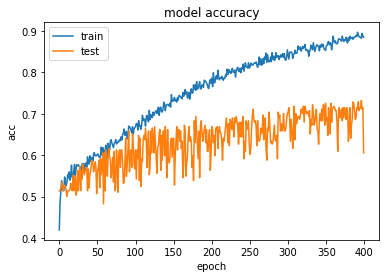

In [157]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [158]:
#save model
model_name = '24_Model_ravdess.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at C:\Users\ioann\saved_models\24_Model_ravdess.h5 


In [159]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [160]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("saved_models/24_Model_ravdess.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 60.56%


In [256]:
preds = loaded_model.predict(x_testcnn, 
                         batch_size=32, 
                         verbose=1)

60/60 [==============================] - 1s 10ms/step


In [257]:
preds1=preds.argmax(axis=1)
preds1

array([6, 6, 6, 6, 6, 6, 6, 6, 1, 6, 2, 1, 2, 4, 7, 1, 0, 0, 2, 3, 6, 6,
       6, 6, 6, 7, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 3, 6, 3, 3, 4, 6, 4, 3,
       0, 0, 0, 2, 2, 2, 2, 2, 7, 7, 2, 7, 2, 0, 2, 7], dtype=int64)

In [258]:
abc = preds1.astype(int).flatten()
predictions = (lb.inverse_transform((abc)))

In [259]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

,predictedvalues
0,sad
1,sad
2,sad
3,sad
4,sad
5,sad
6,sad
7,sad
8,calm
9,sad


In [260]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [261]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

,actualvalues
0,neutral
1,neutral
2,neutral
3,neutral
4,calm
5,calm
6,calm
7,calm
8,calm
9,calm


In [262]:
finaldf = actualdf.join(preddf)

In [263]:
finaldf.groupby('actualvalues').count()

,predictedvalues
actualvalues,
angry,8
calm,8
disgusted,8
fearful,8
happy,8
neutral,4
sad,8
surprised,8


In [264]:
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
angry,14
calm,3
disgusted,11
fearful,5
happy,3
sad,18
surprised,6


In [265]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [266]:
from sklearn.metrics import accuracy_score
y_true = finaldf.actualvalues
y_pred = finaldf.predictedvalues
accuracy_score(y_true, y_pred)*100

51.66666666666667

In [267]:
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_true, y_pred)
c

array([[8, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 1, 0, 0, 0, 5, 0],
       [3, 0, 5, 0, 0, 0, 0, 0],
       [0, 0, 0, 4, 2, 0, 2, 0],
       [2, 1, 2, 1, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 4, 0],
       [0, 0, 0, 0, 0, 0, 7, 1],
       [1, 0, 3, 0, 0, 0, 0, 4]], dtype=int64)

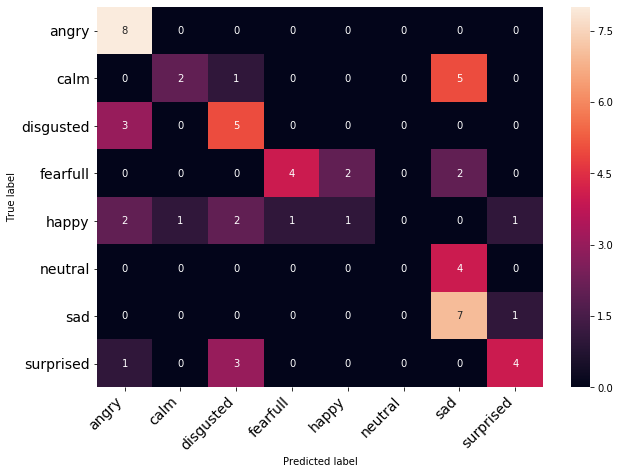

In [268]:
class_names = ['angry', 'calm', 'disgusted', 'fearfull', 'happy', 'neutral', 'sad', 'surprised']


print_confusion_matrix(c, class_names)